<a href="https://colab.research.google.com/github/thisisatharva/GANS/blob/main/Basic_GAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.layers import Dense, Flatten, Reshape, LeakyReLU
from keras.models import Sequential
from keras.optimizers import Adam
from keras.datasets import mnist 

In [ ]:
HEIGHT = 28
WIDTH = 28
CH = 1
IMG_SHAPE = (HEIGHT, WIDTH, CH)
N_DIM = 100

# Generator 

In [ ]:
def build_generator(img_shape, n_dim):
    model = Sequential()
    model.add(Dense(128, input_dim=n_dim))
    model.add(LeakyReLU(alpha=0.1))
    model.add(Dense(28*28*1, activation='tanh'))
    model.add(Reshape(IMG_SHAPE))
    return model

# Discriminator 

In [ ]:
def build_discriminator(img_shape):
    model = Sequential()
    model.add(Flatten(input_shape=img_shape))
    model.add(Dense(128))
    model.add(LeakyReLU(alpha=0.1))
    model.add(Dense(1, activation='sigmoid'))
    return model

# Building and training GAN 

In [ ]:
def build_gan(generator, discriminator):
    model = Sequential()
    model.add(generator)
    model.add(discriminator)
    return model

In [ ]:
discriminator = build_discriminator(IMG_SHAPE)
discriminator.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [ ]:
generator = build_generator(IMG_SHAPE, N_DIM)
discriminator.trainable = False     #Discriminator parameters constant during the training of generator 
gan = build_gan(generator, discriminator)
gan.compile(loss='binary_crossentropy', optimizer='Adam')

In [ ]:
def train(iterations, batch_size, sample_interval):
    (X_train, _), (_, _) = mnist.load_data()
    X_train = X_train/127.5 - 1.0
    X_train = np.expand_dims(X_train, axis=3)

    real = np.ones((batch_size, 1))
    fake = np.zeros((batch_size, 1))

    for iteration in range(iterations):
        idx = np.random.randint(0, X_train.shape[0], batch_size)
        imgs = X_train[idx]

        z = np.random.normal(0,1, (batch_size, 100))
        gen_imgs = generator.predict(z)

        d_loss_real = discriminator.train_on_batch(imgs, real)
        d_loss_fake = discriminator.train_on_batch(gen_imgs, fake)
        d_loss, accuracy = 0.5 * np.add(d_loss_real, d_loss_fake)

        z = np.random.normal(0,1, (batch_size, 100))
        gen_imgs = generator.predict(z)

        g_loss = gan.train_on_batch(z, real)

        if (iteration + 1) % sample_interval == 0:
            print("%d [D loss: %f, acc.: %.2f%%] [G loss: %f]" % (iteration + 1, d_loss, 100.0 * accuracy, g_loss))
            sample_images(generator)

In [ ]:
def sample_images(generator, rows=4, columns=4):
    z = np.random.normal(0, 1, (rows*columns, N_DIM))
    gen_imgs = generator.predict(z)

    gen_imgs = 0.5*gen_imgs + 0.5                      #rescale to [0,1]
    fig, axs = plt.subplots(rows, columns, sharey=True, sharex=True)

    cnt=0
    for i in range(rows):
        for j in range(columns):
            axs[i,j].imshow(gen_imgs[cnt, :, :, 0])
            axs[i,j].axis('off')
            cnt+=1

1000 [D loss: 0.462715, acc.: 81.64%] [G loss: 2.942870]
2000 [D loss: 0.586927, acc.: 74.22%] [G loss: 3.231085]
3000 [D loss: 0.416989, acc.: 82.81%] [G loss: 3.169831]
4000 [D loss: 0.611484, acc.: 72.27%] [G loss: 2.464024]
5000 [D loss: 0.465868, acc.: 77.73%] [G loss: 2.599683]
6000 [D loss: 0.433507, acc.: 79.30%] [G loss: 2.180176]
7000 [D loss: 0.505720, acc.: 79.30%] [G loss: 2.231738]
8000 [D loss: 0.516217, acc.: 74.61%] [G loss: 2.378957]
9000 [D loss: 0.616260, acc.: 68.75%] [G loss: 1.680572]
10000 [D loss: 0.595354, acc.: 73.44%] [G loss: 1.966706]
11000 [D loss: 0.439421, acc.: 77.34%] [G loss: 1.667333]
12000 [D loss: 0.441847, acc.: 78.12%] [G loss: 1.829753]
13000 [D loss: 0.471308, acc.: 80.08%] [G loss: 2.042057]
14000 [D loss: 0.539829, acc.: 71.09%] [G loss: 1.799415]
15000 [D loss: 0.594692, acc.: 69.53%] [G loss: 1.594822]
16000 [D loss: 0.557346, acc.: 72.66%] [G loss: 1.372964]
17000 [D loss: 0.430860, acc.: 80.86%] [G loss: 1.933515]
18000 [D loss: 0.532210

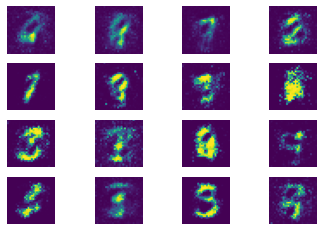

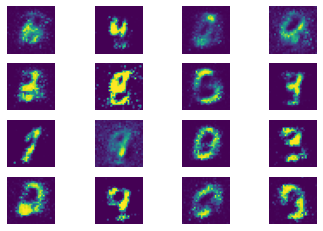

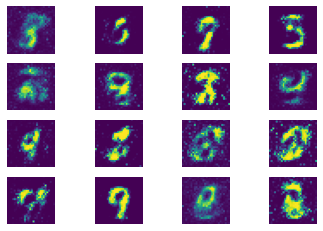

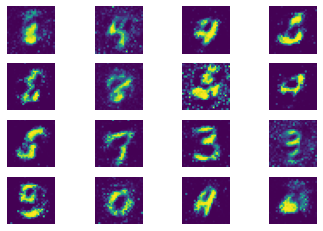

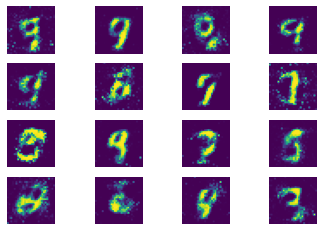

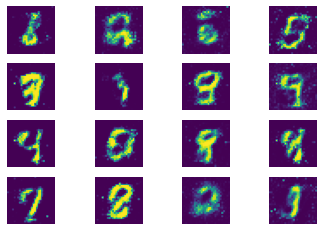

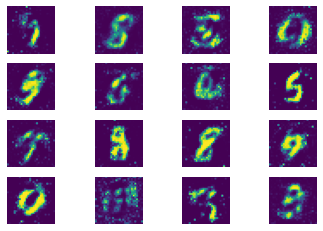

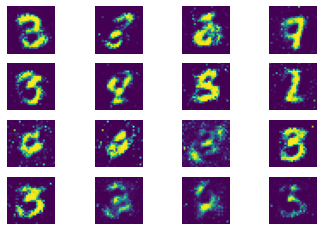

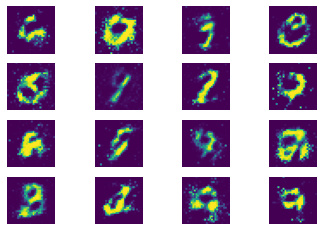

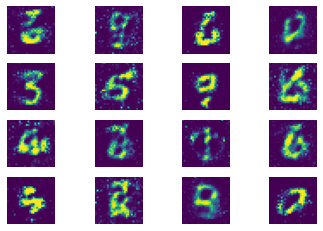

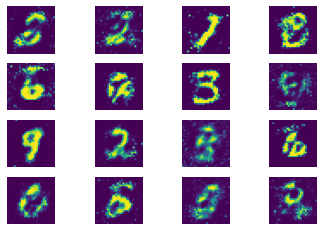

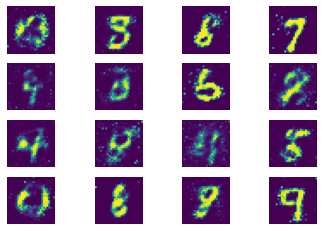

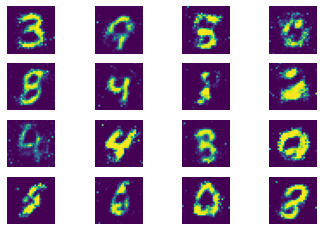

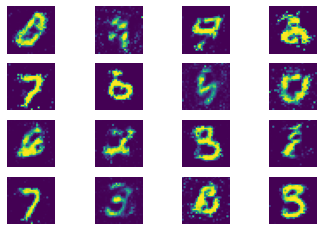

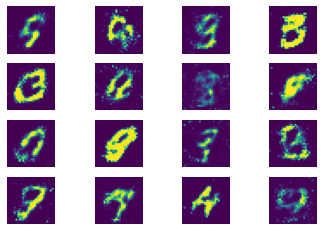

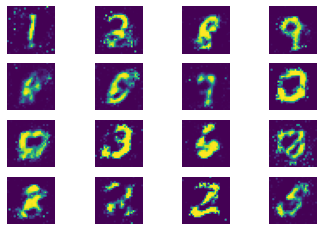

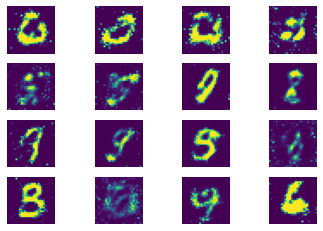

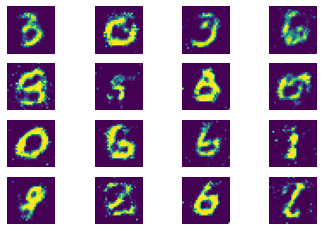

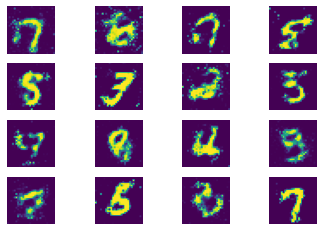

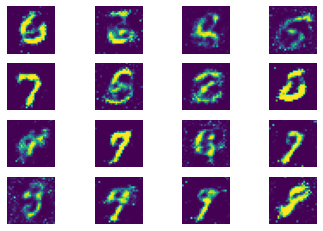

In [ ]:
ITR = 20000
BATCH_SIZE = 128
SAMPLE_INTERVAL = 1000

train(ITR, BATCH_SIZE, SAMPLE_INTERVAL)